# Simulations for batch and continuous PAnMBR model

This work mirrors that done for the paper from Puyol 2017. I have decided to rewrite and resimulate the model in Python because I can't be sure that Matlab or Octave will be able to run the code I wrote for versions in 2012 and 2014 and I can't count on having a Matlab license forever.

The simulations are done using odeint which is sufficient for the stiff nature of the set of ODEs.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from pam1 import *

## Simulation Case 1

This case is divided into two test cases: i) Analysis of the effects of limiting $\mathrm{NH_4\mbox{-}N}$ and SCOD on each other, and ii) analysis of the effects of limiting $\mathrm{PO_4\mbox{-}P}$ and SCOD on each other.

In [8]:
# 30 W/m2 uniform irradiance
#########################################################
# USER INPUT
num_steps = 800

days = 120604/3600/24
SS0 = 200.0
SAC0 = 500.0
SIC0 = 7.0E-6
SH20 = 0.0
SIN0 = 45  # 45
SIP0 = 8.15   # 8.15
SI0 = 150.0
XPB0 = 500.0
XS0 = 300.0
XI0 = 100.0

##########################################################
y0 = [SS0, SAC0, SIC0, SH20, SIN0, SIP0, SI0, XPB0, XS0, XI0,]

time_ode = np.linspace(0,days,num_steps)
#u_t = interp1d(time_input.squeeze(), full_G850.squeeze())

# Store our state outputs here
y_out = [y0]

# Loop over each point in the dataset

for step in range(num_steps - 1):
    t = [time_ode[step], time_ode[step+1]]
    
    # Get G850 for this step
    G850 = 50

    # Solve the ODEs
    soln = odeint(pam_batch, y0, t, args=(G850,))
    y_inter = np.float64(soln[1])
    y_out.append(y_inter)
    y0 = y_inter.tolist()


y_out = np.asarray(y_out)
df_30 = pd.DataFrame(y_out)
df_30['SSout'] =  y_out[:,0]
df_30['SACout'] = y_out[:,1]
df_30['SICout'] = y_out[:,2]
df_30['SH2out'] = y_out[:,3]
df_30['SINout'] = y_out[:,4]
df_30['SIPout'] = y_out[:,5]
df_30['SIout'] = y_out[:,6]
df_30['XPBout'] = y_out[:,7]
df_30['XSout'] = y_out[:,8]
df_30['XIout'] = y_out[:,9] 
df_30['time'] = time_ode

In [9]:
df_30.head()

,0,1,2,3,4,5,6,7,8,9,...,SACout,SICout,SH2out,SINout,SIPout,SIout,XPBout,XSout,XIout,time
0,200.000000,500.000000,0.000007,0.000000,45.000000,8.150000,150.000000,500.000000,300.000000,100.000000,...,500.000000,0.000007,0.000000,45.000000,8.150000,150.000000,500.000000,300.000000,100.000000,0.000000
1,199.837582,498.932071,0.000014,0.009815,44.898865,8.132381,150.005642,501.155387,300.041545,100.016095,...,498.932071,0.000014,0.009815,44.898865,8.132381,150.005642,501.155387,300.041545,100.016095,0.001747
2,199.674546,497.862180,0.000021,0.019571,44.797513,8.114724,150.011285,502.313232,300.083267,100.032191,...,497.862180,0.000021,0.019571,44.797513,8.114724,150.011285,502.313232,300.083267,100.032191,0.003494
3,199.510889,496.790325,0.000028,0.029226,44.695941,8.097029,150.016928,503.473583,300.125166,100.048290,...,496.790325,0.000028,0.029226,44.695941,8.097029,150.016928,503.473583,300.125166,100.048290,0.005241
4,199.346608,495.716506,0.000035,0.038739,44.594145,8.079295,150.022573,504.636483,300.167243,100.064392,...,495.716506,0.000035,0.038739,44.594145,8.079295,150.022573,504.636483,300.167243,100.064392,0.006988


In [23]:
SS0 = np.arange(start=0.1, stop=500, step=10)
SAC0 = np.arange(start=0.1, stop=500, step=10)
SIN0 = np.arange(start=0.01, stop=50, step=1)


In [24]:
SCOD0 = SS0 + SAC0

In [35]:
xx, yy = np.meshgrid(SCOD0, SIN0)

In [44]:
z = np.sin((xx/10)**2 + yy**2)

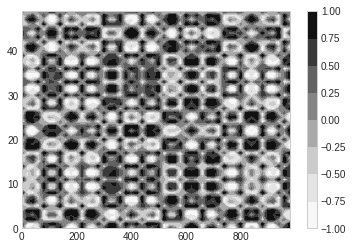

In [47]:
plt.contourf(SCOD0, SIN0, z)
plt.colorbar()


In [46]:
z

array([[ 4.99999979e-04, -8.06913184e-01, -4.37248325e-01, ...,
        -6.29746789e-01,  6.69799166e-01,  8.01718765e-01],
       [ 8.52369598e-01, -9.25625578e-01, -9.95176409e-01, ...,
         3.32329891e-01, -2.82176179e-01,  9.28898503e-01],
       [-7.82647238e-01,  9.64693714e-01,  9.75929682e-01, ...,
        -2.15476870e-01,  1.63728579e-01, -9.66959248e-01],
       ...,
       [-9.85596303e-01,  7.18971061e-01,  9.60471600e-01, ...,
        -6.58735862e-01,  6.18180837e-01, -7.25019567e-01],
       [-8.24041218e-01,  3.00958434e-02,  4.93814519e-01, ...,
        -9.96846413e-01,  9.91280929e-01, -3.88326461e-02],
       [ 9.72997398e-01, -3.88932566e-01, -7.74448742e-01, ...,
         9.00963696e-01, -8.76851881e-01,  3.96971334e-01]])